In [27]:
import time
start_time = time.time()

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,KFold, cross_val_score,train_test_split

In [28]:
totalData = pd.read_csv("F:/MyLife/9. DataSets-20190613T131859Z-001/9. DataSets/adult_test.csv",sep=',',header=None,skiprows=1)
totalData.head()

totalData.mean()

totalData.columns = ['age','workclass','finalweight',
                     'education','education-num','marital-status','occupation','relationship',
                     'race','sex','capital-gain','capital-loss','hours-per-week',
                     'native-country','SalClassify'] 

In [29]:
totalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
finalweight       16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
SalClassify       16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [4]:
corr_matrix = totalData.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [30]:
totalData['capital-loss'].isnull().sum()

0

In [5]:
to_drop = [column for column in upper.columns if any(upper[column]>0.5)]
print(to_drop)

[]


In [31]:
totalData = totalData.drop(['finalweight','relationship','race','education','education-num','marital-status','native-country'],axis=1)
totalData.head()

,age,workclass,occupation,sex,capital-gain,capital-loss,hours-per-week,SalClassify
0,25,Private,Machine-op-inspct,Male,0,0,40,<=50K.
1,38,Private,Farming-fishing,Male,0,0,50,<=50K.
2,28,Local-gov,Protective-serv,Male,0,0,40,>50K.
3,44,Private,Machine-op-inspct,Male,7688,0,40,>50K.
4,18,?,?,Female,0,0,30,<=50K.


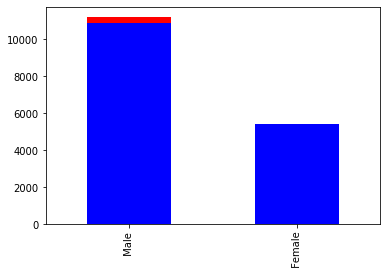

In [32]:
difWorkCls = totalData['workclass'].value_counts()
difWorkCls.plot.bar(color='r')
difOccupation = totalData['occupation'].value_counts()
difOccupation.plot.bar(color='g')
difGender = totalData['sex'].value_counts()
difGender.plot.bar(color='b')

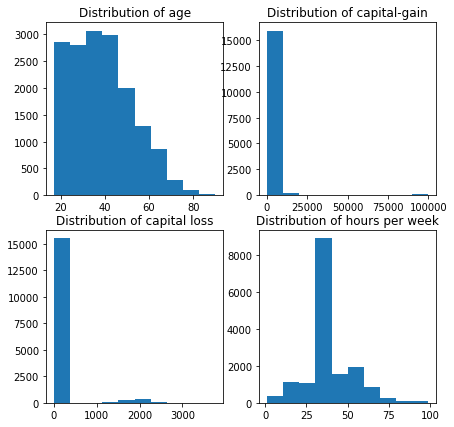

In [33]:
fig,axes = plt.subplots(2,2)
axes[0,0].hist(x='age',data=totalData)
axes[0,0].set_title('Distribution of age')
axes[0,1].hist(x='capital-gain',data=totalData)
axes[0,1].set_title('Distribution of capital-gain')
axes[1,0].hist(x='capital-loss',data=totalData)
axes[1,0].set_title('Distribution of capital loss')
axes[1,1].hist(x='hours-per-week',data=totalData)
axes[1,1].set_title('Distribution of hours per week')
fig.set_size_inches(7,7)

In [34]:
X = totalData.iloc[:,0:-1].values
X
y = totalData.iloc[:,-1].values
y

array([' <=50K.', ' <=50K.', ' >50K.', ..., ' <=50K.', ' <=50K.',
       ' >50K.'], dtype=object)

In [10]:
minmaxScaler = MinMaxScaler()
AftrminMaxScaler = minmaxScaler.fit_transform(np.concatenate((X[:,0:1],X[:,4:7]),axis=1))
AftrminMaxScaler

array([[0.10958904, 0.        , 0.        , 0.39795918],
       [0.28767123, 0.        , 0.        , 0.5       ],
       [0.15068493, 0.        , 0.        , 0.39795918],
       ...,
       [0.28767123, 0.        , 0.        , 0.5       ],
       [0.36986301, 0.05455055, 0.        , 0.39795918],
       [0.24657534, 0.        , 0.        , 0.60204082]])

In [11]:
X[:,0:1] = minmaxScaler.fit_transform(X[:,0:1])
X[:,0:1]
X[:,4:5] = minmaxScaler.fit_transform(X[:,4:5])
X[:,4:5]
X[:,5:6] = minmaxScaler.fit_transform(X[:,5:6])
X[:,5:6]
X[:,6:7] = minmaxScaler.fit_transform(X[:,6:7])
X[:,6:7]
X

array([[0.1095890410958904, ' Private', ' Machine-op-inspct', ..., 0.0,
        0.0, 0.39795918367346933],
       [0.2876712328767123, ' Private', ' Farming-fishing', ..., 0.0,
        0.0, 0.5],
       [0.1506849315068493, ' Local-gov', ' Protective-serv', ..., 0.0,
        0.0, 0.39795918367346933],
       ...,
       [0.2876712328767123, ' Private', ' Prof-specialty', ..., 0.0, 0.0,
        0.5],
       [0.3698630136986301, ' Private', ' Adm-clerical', ...,
        0.05455054550545505, 0.0, 0.39795918367346933],
       [0.2465753424657534, ' Self-emp-inc', ' Exec-managerial', ...,
        0.0, 0.0, 0.6020408163265305]], dtype=object)

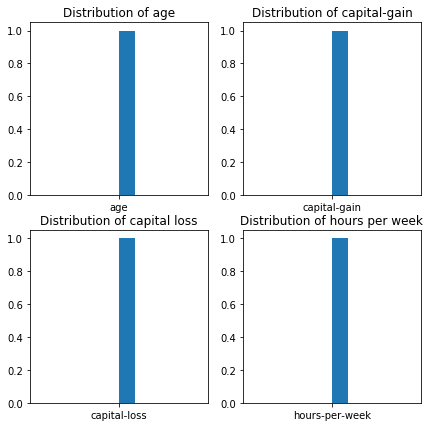

In [12]:
fig,axes = plt.subplots(2,2)
axes[0,0].hist(x='age',data=X[:,0:1])
axes[0,0].set_title('Distribution of age')
axes[0,1].hist(x='capital-gain',data=X[:,4:5])
axes[0,1].set_title('Distribution of capital-gain')
axes[1,0].hist(x='capital-loss',data=X[:,5:6])
axes[1,0].set_title('Distribution of capital loss')
axes[1,1].hist(x='hours-per-week',data=X[:,6:7])
axes[1,1].set_title('Distribution of hours per week')
fig.set_size_inches(7,7)

In [35]:
label1 = LabelEncoder()
label2 = LabelEncoder()
label3 = LabelEncoder()
X[:,1] = label1.fit_transform(X[:,1])
X[:,1]
X[:,2] = label2.fit_transform(X[:,2])
X[:,2]
X[:,3] = label3.fit_transform(X[:,3])
X[:,3]
onehotencoder = OneHotEncoder(categories='auto') 
X = onehotencoder.fit_transform(X).toarray() 
X
y

array([' <=50K.', ' <=50K.', ' >50K.', ..., ' <=50K.', ' <=50K.',
       ' >50K.'], dtype=object)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=41)

In [38]:
#####################Logistic Regression ################################
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[3978,  194],
       [ 624,  631]], dtype=int64)

In [39]:
#####################SVM Classification #################################
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm
model = SVC(kernel='poly')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm
model = SVC(kernel='sigmoid')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[4172,    0],
       [1201,   54]], dtype=int64)

In [40]:
#####################NaiveBayes Classification ##########################
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 884, 3288],
       [  15, 1240]], dtype=int64)

In [42]:
#####################KNN Classification #################################
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[3812,  360],
       [ 773,  482]], dtype=int64)

In [19]:
#####################DecisionTree Classification ########################
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[3766,  406],
       [ 618,  637]], dtype=int64)

In [20]:
#####################RandomForest Classification ########################
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[3814,  358],
       [ 666,  589]], dtype=int64)

In [21]:
#####################AdaBoost Classification ############################
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[3874,  298],
       [ 596,  659]], dtype=int64)

In [22]:
#####################GradientBoost Classification #######################
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[4065,  107],
       [ 801,  454]], dtype=int64)

In [23]:
#####################Bagging Classification ############################
model = BaggingClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[3804,  368],
       [ 612,  643]], dtype=int64)

In [24]:
#####################ExtraTree Classification ##########################
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[3853,  319],
       [ 654,  601]], dtype=int64)

In [25]:
#####################GridSearchCV Classification #######################
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
grid = GridSearchCV(LogisticRegression(), hyperparameters, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Best Penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best C:', grid.best_estimator_.get_params()['C'])

cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Penalty: l1
Best C: 2.7825594022071245


array([[3853,  319],
       [ 654,  601]], dtype=int64)

In [26]:
print('KFold CrossValScore %s' % cross_val_score(LogisticRegression(), X, y).mean())

#pickle.dump(grid, open('model.pkl','wb'))
#model = pickle.load(open('model.pkl','rb'))

sample_split_range = list(range(2, 150))
param_grid = dict(min_samples_split=sample_split_range)
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\User02\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KFold CrossValScore 0.8471838339168357
--- 2477.3564217090607 seconds ---
